In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
import scipy.stats as sci_rnd
from scipy.stats import kurtosis
import pandas as pd

np.random.seed(1865)

# Statistics I

Python has several packages which are optimised for statistics. In particular here we will be using the numpy random and scipy stats packages.

    numpy.random
    scipy.stats

In this lab we'll learn how to use these packages to plot statistical distributions by generating random variables in Python, and we'll try to calculate summary statistics such as the mean and variance of the distributions.

Additionally we'll see practical examples of the central limit therom showing that a Poisson process becomes Gaussian in the large number limit.

In statistics II we will use the distributions we learned about in notebook 2a to generate mock data and we'll go further and fit an analytical solution to that data.
Additionally we'll introduce Monte Carlo methods and use them to calculate the value of pi.

# The packages we will use:

Scan through the help pages related to numpy.random

https://numpy.org/doc/stable/reference/random/index.html#random-sampling-numpy-random

and scipy.stats

https://docs.scipy.org/doc/scipy/reference/stats.html

think about why they might be useful and where they do the same thing.

# Some basic statistics

Random variables are generated using a submodule of numpy called `numpy.random`. In this notebook we've just imported it with the abbreviation `rnd`.

The submodule contains functions to sample from many different types of probability distributions. Each one has a few parameters, and each also has a `size=` keyword to decide how many samples to draw from the distribution.

For instance, to flip one fair coin 100 times, we do:

`flips = rnd.binomial(1, 0.5, , size=100)`

For an unfair coin, we change the $p$ parameter:

`flips = rnd.binomial(1, 0.9, size=100)`

To look at the results, we can plot a histogram, and we can calculate some summary statistics like mean, variance, and kurtosis.

Let's start by getting to know some of these probability distributions.

Remeber you can use "?" to bring up the "doc string" in the function and learn more about the function and how to call it.

In [ ]:
rnd.binomial?

### Uniform

The parameters are the lower and upper limits. Every real value between the limits is equally likely.

In [2]:
dist1 = rnd.uniform(-1., 1., size=1000000)

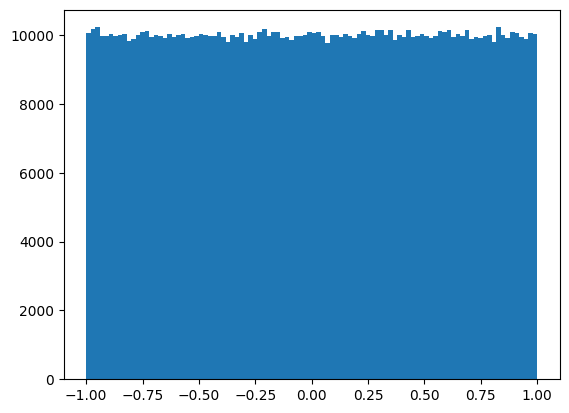

In [5]:
plt.hist(dist1, bins=100);

There are some options in the histogram that we are using. A histogram divides data into bins. We are setting the number of bins explicitly, rather than letting the `hist` function determine them automatically. More bins will make the plot look noisier but the shape will be better determined. The more data we have, typically the more bins we can use.

There are two ways to find the mean of an array. Either we do `np.mean(arr)` or `arr.mean()`. The first is using a numpy function; it would also work given a list. The second is using a *method* of the array; each numpy array has this function attached to it.

**Exercise**
 1. Plot the histogram of dist 1 with the integral of the histogram summed to one. (Look at the matplotlib 'hist' help pages for hints.
 2. Think about what the mean of this distribution is. Then check it.
 3. Find the standard deviation by using the function `np.std`.

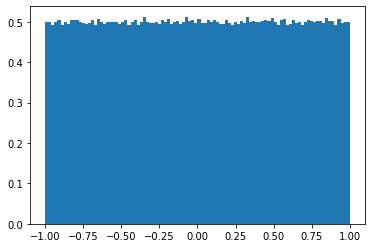

In [ ]:
# Answer
plt.hist(dist1, bins=100, density=True);

In [ ]:
# Answer
np.mean(dist1)

0.0004846398942374462

In [ ]:
# Answer
np.std(dist1)

0.5772013747592943

If we have $N$ samples from a distribution, and the samples are called $y_i$, the mean is

$$
\mathrm{mean}(y) \equiv \bar{y} = \frac{1}{N} \sum_{i=0}^{N} y_i
$$

and the standard deviation is

$$
\mathrm{std}(y) = \sqrt{\frac{1}{N-1} \sum_{i=0}^{N} (y_i - \bar{y})^2}
$$

The mean tells us where the middle of the distribution is, the standard deviation is how scattered the samples are around the mean.

Note - the mean and standard deviation calculated by sampling from the distribution are random; there is some scatter around the true values, especially when you have a small number of samples.

**Exercise**
 1. Make a uniform distribution with a mean of 2.
 1. Find out whether the standard deviation changes with the number of samples.
 1. Figure out how far apart the upper and lower bounds must be to make the standard deviation double what it is in the example  above.

1.9992697718704264
0.5771915740950863


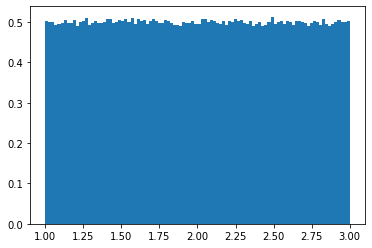

In [ ]:
# Answer
dist1 = rnd.uniform(1, 3., size=1000000)
plt.hist(dist1, bins=100, density=True);
print(np.mean(dist1))
print(np.std(dist1))

In [ ]:
# Answer
dist1 = rnd.uniform(1, 3., size=1000)
print(np.mean(dist1))
print(np.std(dist1))

1.9959686487140538
0.5596039708218274


In [ ]:
# Answer
dist1 = rnd.uniform(0, 4., size=1000)
print(np.mean(dist1))
print(np.std(dist1))

2.0239711137803824
1.1428114044391209


#### Exercise

1. Generate and plot a uniform distirbution using scipy.stats.  (Hint: use the help pages)

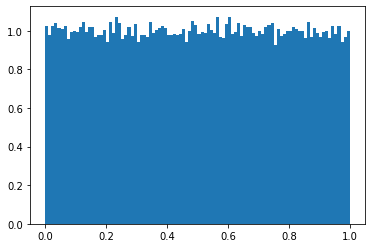

In [ ]:
# Answer
dist1 = sci_rnd.uniform.rvs(size=100000)
plt.hist(dist1, bins=100, density=True);

### Normal distribution

The parameters are the center value and the width. This is also called a Gaussian distribution.

In [ ]:
dist2 = rnd.normal(0., 1., size=1000000)

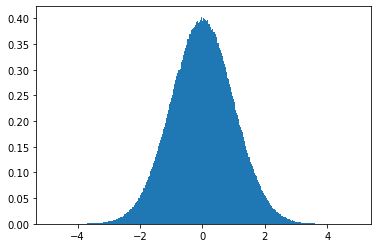

In [ ]:
plt.hist(dist2, bins=300, density=True);
# Aside: try removing the semi-colon from the end of this code

**Exercise**

How are the mean and standard deviation related to the central value and width specified when calling the function? Can you make a normal with a mean of 5? Can you make the standard deviation 3?

Answer

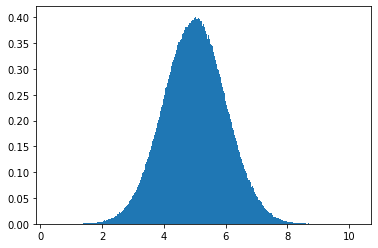

In [ ]:
# Answer
dist2 = rnd.normal(5., 1., size=1000000)
plt.hist(dist2, bins=300, density=True);

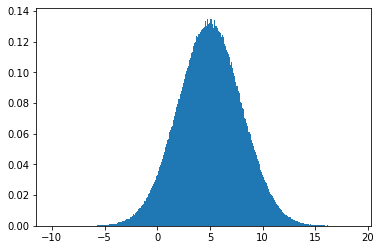

In [ ]:
# Answer
dist2 = rnd.normal(5., 3., size=1000000)
plt.hist(dist2, bins=300, density=True);

#### Exercise

1. Generate and plot a normal distirbution using scipy.stats.

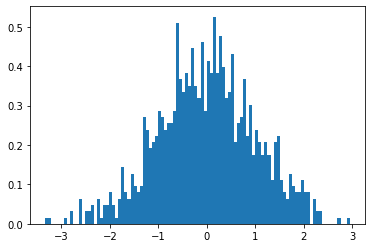

In [ ]:
# Answer
dist2 = sci_rnd.norm.rvs(size=1000)
plt.hist(dist2, bins=100, density=True);

### Binomial

The binomial is a discrete distribution. It has only natural numbers (non-negative integers).

The binomial distribution is sampled from by flipping $n$ coins each with probability $p$ of landing heads. Each sample is the number of coins that landed heads when they were all flipped.

In [ ]:
dist3 = rnd.binomial(6, 0.5, size=10000)

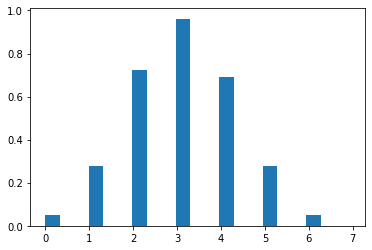

In [ ]:
plt.hist(dist3, bins=np.arange(0,7,0.33), density=True);

**Exercise**
 1. If the coin is fair (p = 0.5), what do you expect the mean to be in terms of the number of coins flipped?
 1. Check whether your prediction is right.
 1. What happens to the mean when you make the coin unfair (more likely to land heads)?
 1. Write some code to vary the number of coins (over a large range), calculate the standard deviation, and then make a plot of one versus the other.
 1. Think about this. Do you expect more or less scatter in the fraction of coin landing heads as the number increases. Is this what you observe? Plot histograms of various binomial distributions with same p but different n on the same plot and verify their shape makes sense.

Answer

In [ ]:
# Answer
# mean is n*p

In [ ]:
# Answer
print(np.mean(dist3))
print(0.5*6)

2.9914
3.0


In [ ]:
# Answer
# p changes

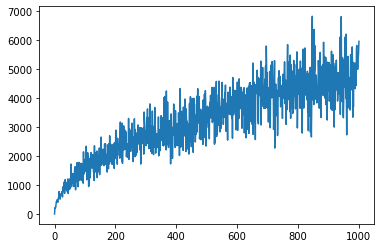

In [ ]:
# Answer
std_vals=[]
upper_lim=100000000
bins=100000
for n in range(0,upper_lim,bins):
    dist3 = rnd.binomial(n, 0.5, size=20)
    std_vals.append(np.std(dist3))
plt.plot(np.linspace(0,round(upper_lim/bins),round(upper_lim/bins)),np.array(std_vals))

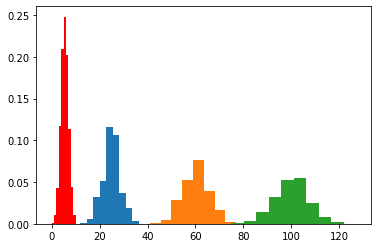

In [ ]:
# Answer
dist3 = rnd.binomial(10, 0.5, size=10000)
plt.hist(dist3, density=True, color='red');
dist3 = rnd.binomial(50, 0.5, size=10000)
plt.hist(dist3, density=True);
dist3 = rnd.binomial(120, 0.5, size=10000)
plt.hist(dist3, density=True);
dist3 = rnd.binomial(200, 0.5, size=10000)
plt.hist(dist3, density=True);
# see wiki for maths behind this spread: https://en.wikipedia.org/wiki/Binomial_distribution

#### Exercise

1. Generate and plot a binomial distirbution using scipy.stats.

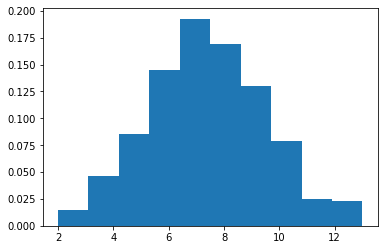

In [ ]:
# Answer
dist3 = sci_rnd.binom.rvs(15, 0.5, size=1000)
plt.hist(dist3, density=True);

### Poisson process

This is the distribution of number of counts in an interval when things are arriving randomly. The parameter is the average rate. A typical example is the number of counts due to radioactive decay. The clicks of a Geiger counter are a Poisson process.

In [ ]:
dist4 = rnd.poisson(100, size=10000);

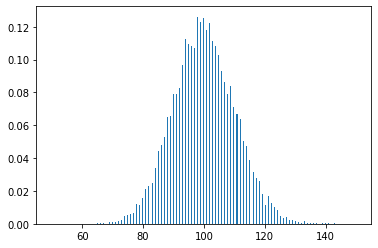

In [ ]:
plt.hist(dist4, bins=np.arange(50,150,0.33), density=True);

**Exercise**: Does the mean match the average rate?

In [ ]:
# Answer
#Yes

#### Exercise

1. Generate and plot a Poisson distirbution using scipy.stats.

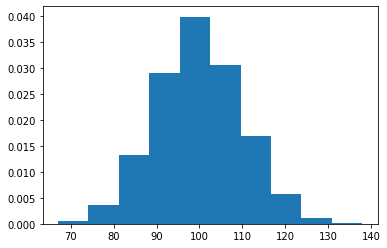

In [ ]:
# Answer
dist4 = sci_rnd.poisson.rvs(100, size=10000)
plt.hist(dist4, density=True);

# RVS, PDF, PMF, CDF and other acronyms...

By now you will likely have noticed that in scipy.stats we called "distribution".rvs to get random varibles which were distributed as a particular distribution.

So what do the other functions mean within the class of a particular distribution?

#### Exercise

Look up the definitions of:
1. RVS
2. PMF
3. PDF
4. CDF
5. PPF


In [ ]:
# Answer
#1. RVS - random varibles
#2. PMF - probability mass function
#3. PDF - probability desnity function
#4. CDF - cumulative distriution function
#5. PPF - percent point function

#### Exercise

1. Use the scipy stats package and the above definitions to plot a curve (not a histogram!) of a Gaussian Distribution from x=0 to x=10 where the Gaussian distribution has a mean of 5 and a std diev of 2.

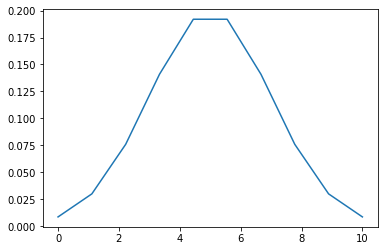

In [ ]:
# Answer
x=np.linspace(0,10,10)
plt.plot(x,sci_rnd.norm.pdf(x, loc=5., scale=2.))

# Large number limit

Let's see what happens when we have a high average rate of counts.

In [ ]:
poisson1 = rnd.poisson(1., size=10000)
poisson10 = rnd.poisson(10., size=10000)
poisson10000 = rnd.poisson(10000., size=10000)

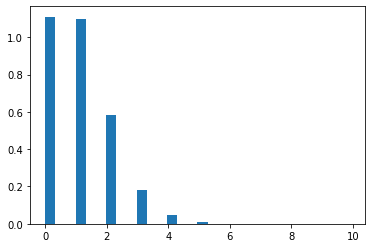

In [ ]:
plt.hist(poisson1, bins=np.arange(0,10,0.33), density=True);

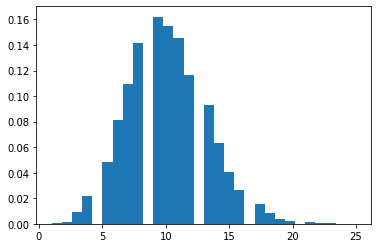

In [ ]:
plt.hist(poisson10, bins=30, density=True);

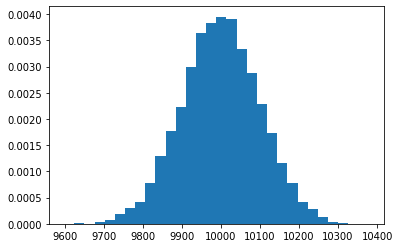

In [ ]:
plt.hist(poisson10000, bins=30, density=True);

**Exercise**: What are the mean and variance of these three processes?

In [ ]:
#Answer
print(np.mean(poisson1), np.var(poisson1))
print(np.mean(poisson10), np.var(poisson10))
print(np.mean(poisson10000), np.var(poisson10000))

1.0068 1.0003537599999999
9.9843 9.84165351
9999.4812 10018.223846559998


**Exercise**: How do the mean and variance depend on the rate of the Poisson process? Can you make a plot? Do number of counts become more or less accurate as they get big?

In [ ]:
#Answer
rates = np.arange(1,100)
means = np.array([np.mean(rnd.poisson(r, size=10000)) for r in rates])
stdevs = np.array([np.std(rnd.poisson(r, size=10000)) for r in rates])

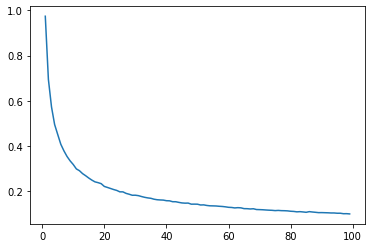

In [ ]:
#Answer
plt.plot(rates, stdevs/means)

**Exercise**:
1. Can you make a normal distribution that looks like poisson10 and another that matches poisson10000? Plot them and verify that they look alike.

In [ ]:
#Answer
np.mean(poisson10), np.var(poisson10)

(9.9843, 9.84165351)

In [ ]:
#Answer
dist10=rnd.normal(10., np.sqrt(10.), size=10000)
dist10000=rnd.normal(10000., np.sqrt(10000.), size=10000)

In [ ]:
#Answer
np.mean(dist10), np.var(dist10)

(10.062687117741458, 9.989915449092951)

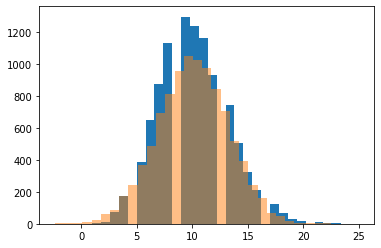

In [ ]:
#Answer
plt.hist(poisson10, bins=30);
plt.hist(dist10, bins=30, alpha=0.5);

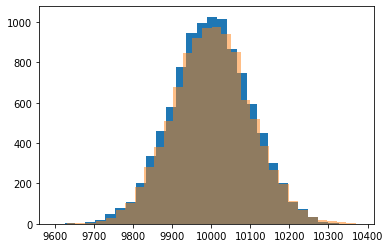

In [ ]:
# Answer
plt.hist(poisson10000, bins=30);
plt.hist(dist10000, bins=30, alpha=0.5);

## Higher Moments

There are more statistics that can be calculated beyond mean and standard deviation. The next two are called skewness and kurtosis.

If two distributions have the same mean and standard deviation, kurtosis can help tell them apart. Positive kurtosis means that there are many values very far from the center; negative that they are concentrated at the middle. The normal distribution is defined to have zero kurtosis.

**Exercise**:

1. Recall how to make a normal distribution with the same mean and standard deviation as a given Poisson distribution. We've imported a `kurtosis` function (see above). Try using the kurtosis to prove that poisson and normal distibutions you cretaed above are actually different.  Redo this for Poisson10000 - what do you notice?

In [ ]:
# Answer
print(kurtosis(poisson10000) - kurtosis(dist10000))
print(kurtosis(poisson10) - kurtosis(dist10))

-0.06581202798374175
0.22629501820299103


#### Exercise
1. Find a function to import for skewness and test this for your two distributions.

In [ ]:
from scipy.stats import skew
print(skew(poisson10000) - skew(dist10000))
print(skew(poisson10) - skew(dist10))

-0.07310784860393063
0.39553500497707017


# Data challenge...

Import the data called emission_line.txt - you will find this on moodle.

#### Exercise:

What distibribution best describes this emission line? (Hint use the help pages to find and test different distributions)

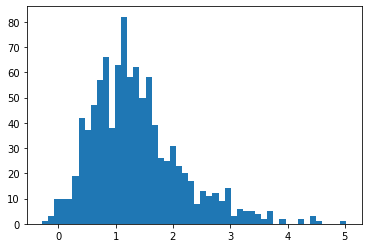

In [ ]:
# Answer - our generation
#mu, beta = 1, 0.6 # location and scale
#emline = rnd.gumbel(mu, beta, 1000)
#plt.hist(emline, bins=50);
#np.savetxt("emission_line.txt", emline)

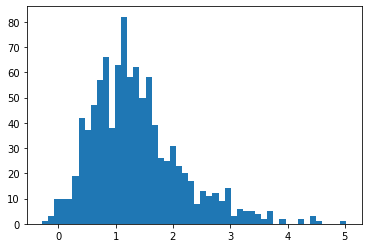

In [ ]:
# Answer
# gumbel function with mu = 1 and beta=0.6
em=np.loadtxt("emission_line.txt")
plt.hist(em, bins=50);

## The Binomial Distribution (extra challenge)

The probability of each value of the binomial distribution is
$$\binom{N}{k} p^k (1-p)^{n-k}$$
Try confirming this.

Now try making flips of an unfair coin (where $p$ is not 1/2, but $n = 1$). How well can you detect how unfair it is?